# **1. Perkenalan Dataset**


# Eksperimen Banknote Authentication Dataset

**Deskripsi Dataset:**
- Dataset ini berisi data banknote (uang kertas) dengan 4 fitur numerik:
    1. Variance of Wavelet Transformed image (variance)
    2. Skewness of Wavelet Transformed image (skewness)
    3. Curtosis of Wavelet Transformed image (curtosis)
    4. Entropy of image (entropy)
- Target: `class` → 0 = genuine/asli, 1 = forged/palsu
- Dataset diambil dari UCI Machine Learning Repository.

**Tujuan Eksperimen:**
1. Memahami distribusi dan karakteristik dataset banknote.
2. Membangun model klasifikasi untuk mendeteksi banknote asli atau palsu.
3. Mengevaluasi performa model menggunakan metrik akurasi, confusion matrix, dan classification report.
4. Menyimpan model untuk digunakan pada prediksi di masa depan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
#Memuat Dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/banknote_authentication.csv"
cols = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
df = pd.read_csv(url, header=None, names=cols)

In [3]:
print("5 data pertama:")
display(df.head())

5 data pertama:


,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
print("\nInformasi dataset:")
print(df.info())


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
print("\nDistribusi kelas target:")
print(df['class'].value_counts())


Distribusi kelas target:
class
0    762
1    610
Name: count, dtype: int64


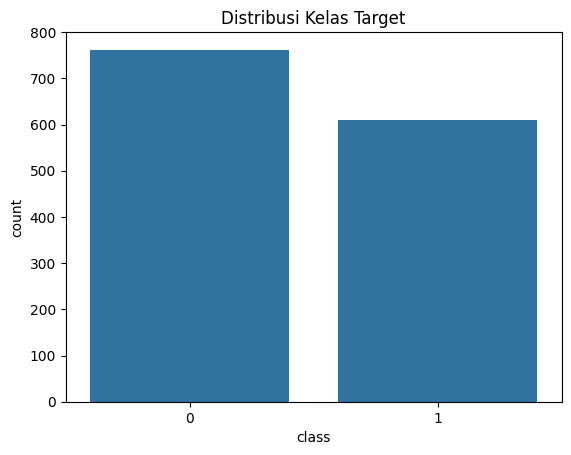

In [6]:
# Visualisasi distribusi target
sns.countplot(x='class', data=df)
plt.title("Distribusi Kelas Target")
plt.show()

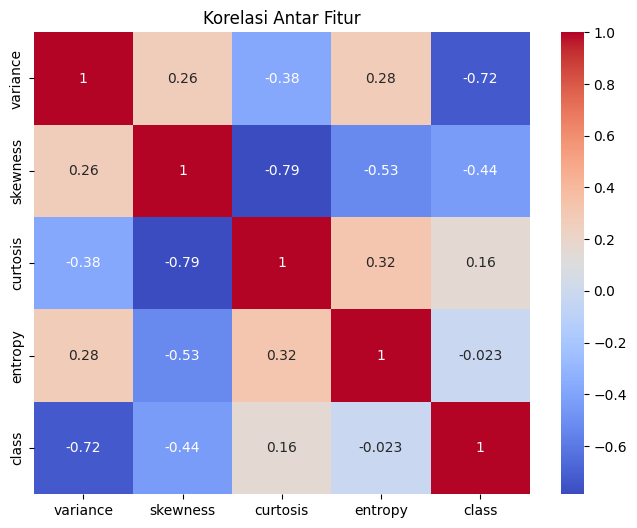

In [7]:
# Visualisasi korelasi fitur
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Antar Fitur")
plt.show()

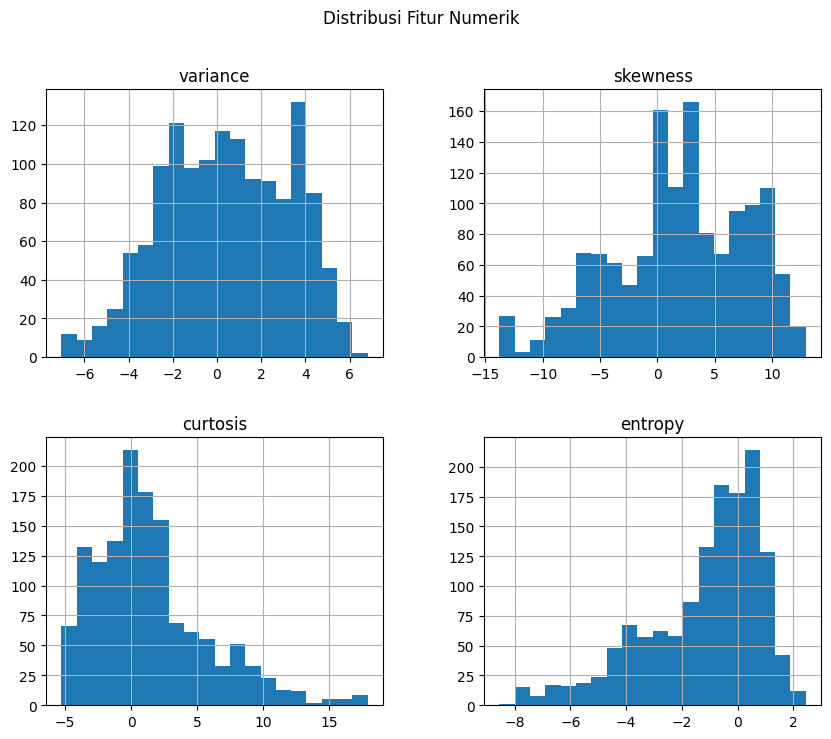

In [8]:
# Histograms untuk tiap fitur
df[['variance','skewness','curtosis','entropy']].hist(figsize=(10,8), bins=20)
plt.suptitle("Distribusi Fitur Numerik")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [9]:
# Memisahkan fitur & target
X = df[['variance','skewness','curtosis','entropy']]
y = df['class']

In [10]:
# Split train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [12]:
X_train.shape, X_test.shape

((1097, 4), (275, 4))

In [13]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [14]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9963636363636363

Confusion Matrix:
 [[152   1]
 [  0 122]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       153
           1       0.99      1.00      1.00       122

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [16]:
model_path = "/content/banknote_rf_model.pkl"
joblib.dump(model, model_path)

print("Model saved to:", model_path)

Model saved to: /content/banknote_rf_model.pkl
